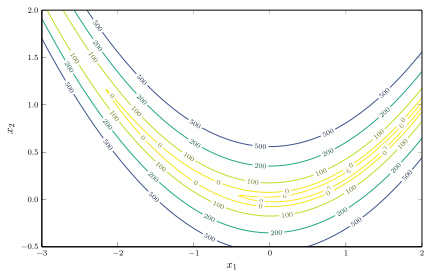

In [55]:
###################################################################################
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx()

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 100*(4x2 - x1^2)^2

x1 = -3:0.01:2
x2 = -0.5:0.01:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels=[2,10,50,200,500], 
    c = cgrad(:viridis, [0.01, 0.02, 0.03], rev = true), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-3,2),
    ylims = (-0.5,2),
    legend = false,
    grid = false,
    contour_labels = true,
    bins = 150,
    label = false)

In [56]:
mutable struct RMSProp
    α # learning rate
    γ # decay
    ϵ # small value
    s # sum of squared gradient
end

function step!(M::RMSProp, f, ∇f, x)
    α, γ, ϵ, s, g = M.α, M.γ, M.ϵ, M.s, ∇f(x)
    s[:] = γ*s + (1-γ)*(g.*g)
    return x - α*g ./ (sqrt.(s) .+ ϵ)
end

step! (generic function with 1 method)

In [57]:
# Mathematical expression
f = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

# Initial point
x0 = [-2,1.5]

2-element Array{Float64,1}:
 -2.0
  1.5

In [58]:
M = RMSProp(0.005, 0.9, 1e-8, zeros(length(x0)))

RMSProp(0.005, 0.9, 1.0e-8, [0.0, 0.0])

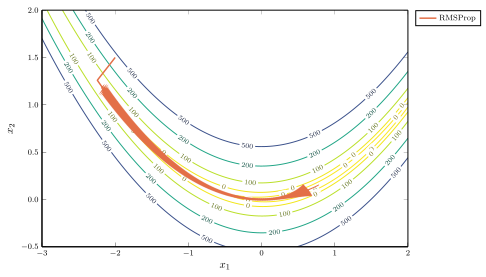

In [59]:
points = []
push!(points, (x0))
N = 2000

for i=1:N
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "RMSProp", legend = true, lw = 1.5)